In [1]:
import os
import json
import datasets


In [2]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize
from scipy.stats import chisquare
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def get_statistics(json_path):
    data = datasets.load_dataset('json', data_files = json_path)
    label = []
    predict = []
    for ex in data:
        label.append(ex['label'])
        predict.append(ex['predicted_label'])
    return label, predict


def get_filter(json_path):
    data = datasets.load_dataset('json', data_files = json_path)['train']
    correct = []
    wrong = []
    for ex in data:
        if  ex['label'] == ex['predicted_label']:
            correct.append(ex)
        else:
            wrong.append(ex)
    return correct, wrong


def filter_noun_verb(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    N = []
    for i in range(1, len(words)):
        w1, t1 = pos_tags[i-1]
        w2, t2 = pos_tags[i]
        if t1.startswith('N'): N.append(w1)
        if t1.startswith('N') and t2.startswith('V'):
            if i+1 < len(words):
                w3, t3 = pos_tags[i+1]
                if t3.startswith('V'):
                    w2 = w3
            return N[0], w2
    
    return "", ""

In [4]:
def get_noun_lables(json_path):
    data = datasets.load_dataset('json', data_files = json_path)['train']
    nouns = []
    verbs = []
    labels = []
    for ex in data:
        h = ex['hypothesis']
        n, v = filter_noun_verb(h)
        nouns.append(n.lower())
        verbs.append(v.lower())
        labels.append(ex['label'])
        
    return nouns, verbs, labels

def chisquare_test(df, w):
    tem = df[df.n == w]
    o = tem.l.value_counts().sort_index()
    e = df.l.value_counts().sort_index()/df.l.value_counts().sum()
    e = e * o.sum()
    chi2_stat, p_value = chisquare(o, f_exp=e)
    return p_value, list(o/o.sum())

def chisquare_test_verb(df, w):
    tem = df[df.v == w]
    o = tem.l.value_counts().sort_index()
    e = df_all.l.value_counts().sort_index()/df_all.l.value_counts().sum()
    e = e * o.sum()
    chi2_stat, p_value = chisquare(o, f_exp=e)
    return p_value, list(o/o.sum())
    


In [5]:
n, v, l = get_noun_lables('data/train_data.json')

In [6]:
# testing for subject (noun)
df_all = pd.DataFrame({'n' : n, 'v': v, 'l': l})
df = df_all[df_all.n != '']

In [7]:
tops = df.n.value_counts()[:5]

In [8]:
tops.index

Index(['man', 'woman', 'people', 'men', 'boy'], dtype='object', name='n')

In [9]:
words = ['Expected_proportion']
p_val = [1]
prop = [list(df_all.l.value_counts().sort_index() /df_all.l.value_counts().sum())]
for t in tops.index:
    words.append(t)
    t1, t2 = chisquare_test(df, t)
    p_val.append(t1)
    prop.append(t2)
    

prop_n = prop

In [10]:
# ploting

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


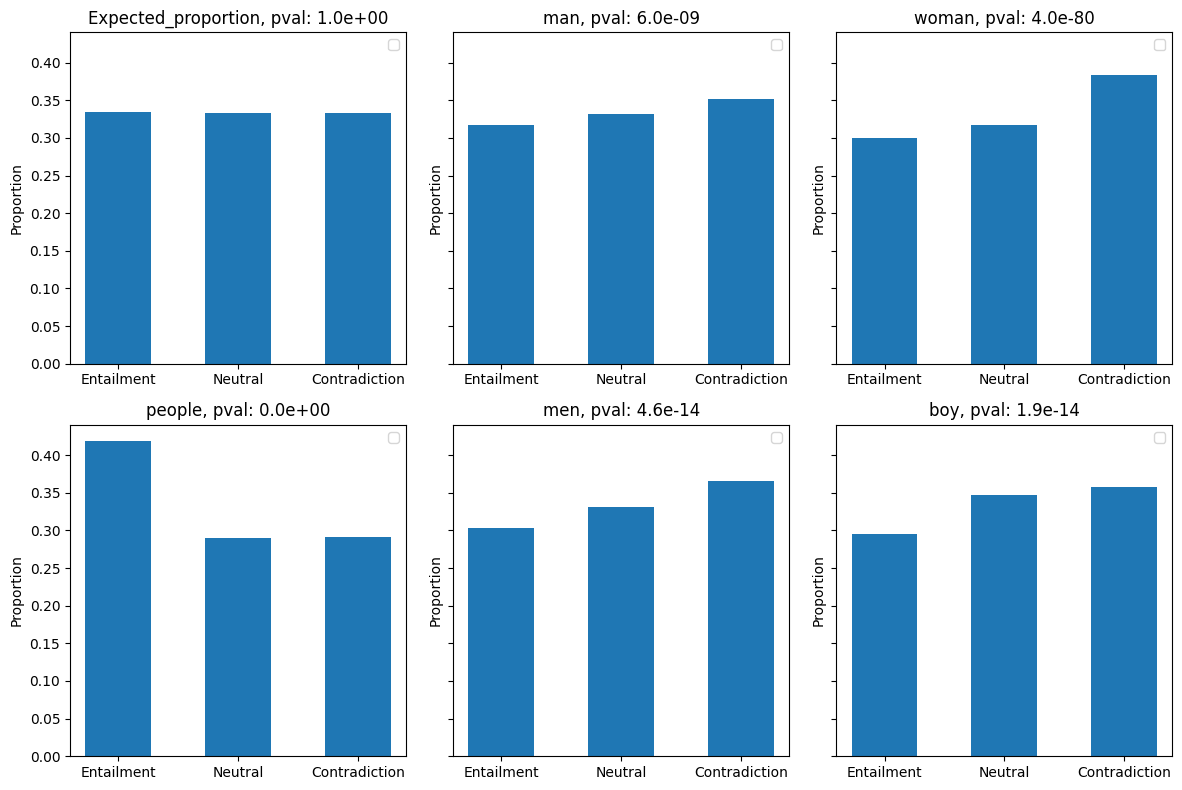

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for each subplot
categories = ['Entailment', 'Neutral', 'Contradiction']
values_list = prop

# Set the bar width
bar_width = 0.55

# Create a figure with 2 rows and 3 columns of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey=True)

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Plot each subplot
for i in range(6):
    ax = axs[i]
    
    # Plot the bar chart for the current subplot
    bars = ax.bar(np.arange(len(categories)), values_list[i], bar_width)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel('Proportion')
    ax.set_title(f'{words[i]}, pval: {p_val[i]:.1e}')
    
    # Add legend
    ax.legend()

    # Set x-axis ticks and labels
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(categories)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
#plt.show()

plt.savefig('noun_chisquare.pdf', format='pdf')

In [12]:
# testing for main verb
df_all = pd.DataFrame({'n' : n, 'v': v, 'l': l})
df = df_all[df_all.v != '']

In [13]:
tops = df.v.value_counts()[:5]
tops.index

Index(['is', 'are', 'playing', 'wearing', 'sitting'], dtype='object', name='v')

In [14]:
words = ['Expected_proportion']
p_val = [1]
prop = [list(df_all.l.value_counts().sort_index() /df_all.l.value_counts().sum())]
for t in tops.index:
    words.append(t)
    t1, t2 = chisquare_test_verb(df, t)
    p_val.append(t1)
    prop.append(t2)
    
prop_v = prop

In [15]:
words

['Expected_proportion', 'is', 'are', 'playing', 'wearing', 'sitting']

In [16]:
prop

[[0.33386788795104183, 0.3326810674831215, 0.3334510445658367],
 [0.3463641173358415, 0.35941449650226326, 0.29422138616189525],
 [0.39158853822791495, 0.33292618513138783, 0.2754852766406972],
 [0.3488457459825434, 0.3061832123337956, 0.344971041683661],
 [0.37764054022855825, 0.29885720881911576, 0.323502250952326],
 [0.2933795411089866, 0.16168738049713194, 0.5449330783938815]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


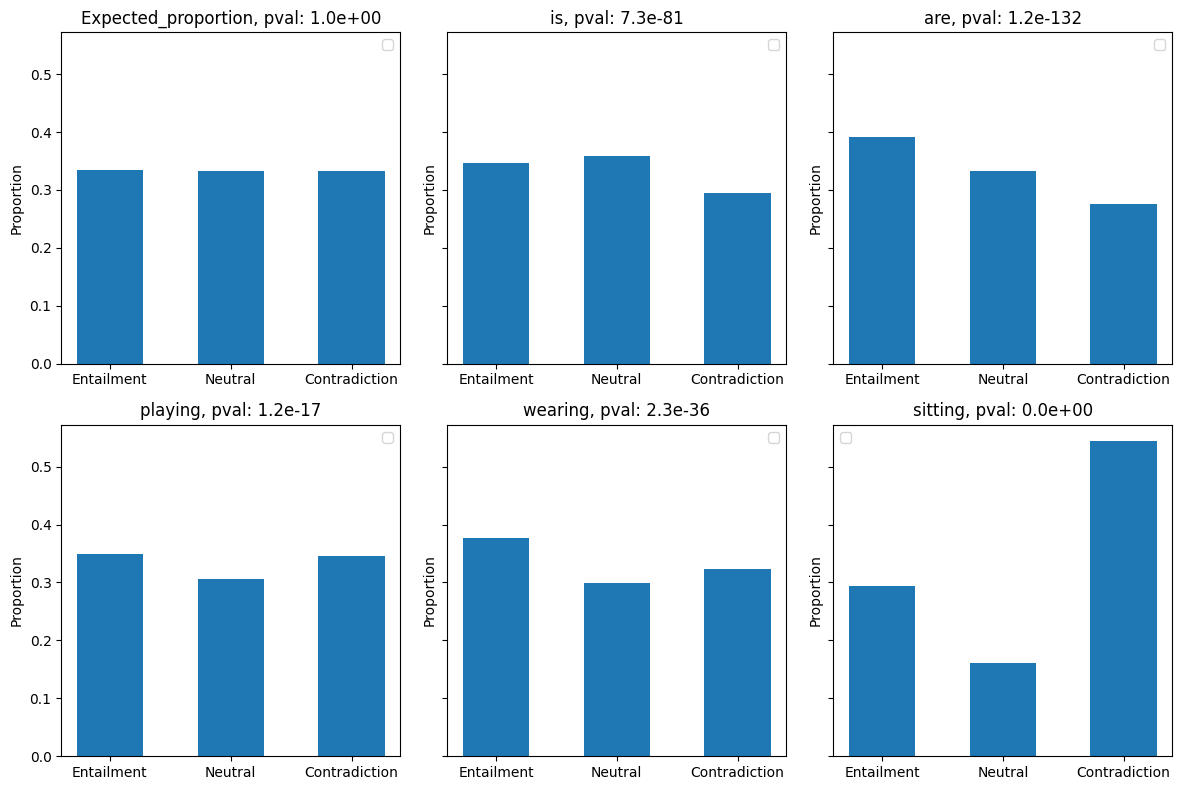

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for each subplot
categories = ['Entailment', 'Neutral', 'Contradiction']
values_list = prop

# Set the bar width
bar_width = 0.55

# Create a figure with 2 rows and 3 columns of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey=True)

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Plot each subplot
for i in range(6):
    ax = axs[i]
    
    # Plot the bar chart for the current subplot
    bars = ax.bar(np.arange(len(categories)), values_list[i], bar_width)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel('Proportion')
    ax.set_title(f'{words[i]}, pval: {p_val[i]:.1e}')
    
    # Add legend
    ax.legend()

    # Set x-axis ticks and labels
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(categories)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
#plt.show()

plt.savefig('verb_chisquare.pdf', format='pdf')

In [18]:
df2 = pd.DataFrame(np.concatenate([prop_n, prop_v]))

In [19]:
df2.to_csv('prop_statistics.csv')